# ðŸ”¹UFC ETL

## 1. Import Libraries and Setup Environment

In [44]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

## 2. Load Data

In [45]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'raw', 'ufc_raw.csv')

ufc_raw = pd.read_csv(file_path)
print(f"Data loaded: {ufc_raw.shape[0]} rows and {ufc_raw.shape[1]} columns.")

Data loaded: 6541 rows and 118 columns.


## 3. Preview

In [46]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()

RedFighter        BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0  Colby Covington    Joaquin Buckley    205.0    -250.0          205.0000   
1      Cub Swanson  Billy Quarantillo    124.0    -148.0          124.0000   
2       Manel Kape        Bruno Silva   -395.0     310.0           25.3165   
3    Vitor Petrino      Dustin Jacoby   -340.0     270.0           29.4118   
4     Adrian Yanez      Daniel Marcos    185.0    -225.0          185.0000   

   BlueExpectedValue        Date             Location Country Winner  ...  \
0            40.0000  2024-12-14  Tampa, Florida, USA     USA   Blue  ...   
1            67.5676  2024-12-14  Tampa, Florida, USA     USA    Red  ...   
2           310.0000  2024-12-14  Tampa, Florida, USA     USA    Red  ...   
3           270.0000  2024-12-14  Tampa, Florida, USA     USA   Blue  ...   
4            44.4444  2024-12-14  Tampa, Florida, USA     USA   Blue  ...   

   FinishDetails FinishRound FinishRoundTime  TotalFightTimeSecs  RedDecOdds  \
0            NaN         3.0            4:42               882.0       300.0   
1          Punch         3.0            1:36               696.0       250.0   
2        Punches         3.0            1:57               717.0      -105.0   
3          Punch         3.0            3:44               824.0       240.0   
4            NaN         3.0            5:00               900.0       450.0   

   BlueDecOdds  RSubOdds  BSubOdds  RKOOdds  BKOOdds  
0        175.0    1800.0    2000.0   1100.0    150.0  
1          NaN    1800.0       NaN    450.0      NaN  
2        550.0     900.0    1800.0    225.0   1100.0  
3        500.0     550.0    3000.0    110.0    800.0  
4        150.0    2200.0    2200.0    450.0    200.0  

[5 rows x 118 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB


## 4. SelecciÃ³n de columnas de interÃ©s

In [47]:
ufc_raw = ufc_raw[['RedFighter', 'BlueFighter','Winner',
       'TitleBout','Gender', 'NumberOfRounds',
       'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
       'BlueLongestWinStreak', 'BlueLosses','BlueTotalRoundsFought', 
       'BlueTotalTitleBouts','BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit',
       'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission',
       'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance',
       'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws',
       'RedAvgSigStrPct', 'RedAvgSubAtt','RedAvgTDLanded', 
       'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses',
       'RedTotalRoundsFought', 'RedTotalTitleBouts','RedWinsByDecisionMajority', 
       'RedWinsByDecisionSplit','RedWinsByDecisionUnanimous', 'RedWinsByKO', 
       'RedWinsBySubmission','RedWinsByTKODoctorStoppage', 'RedWins',
       'RedStance', 'RedHeightCms','RedReachCms', 
       'RedWeightLbs', 'RedAge', 'BlueAge',
       'LoseStreakDif','WinStreakDif', 'LongestWinStreakDif', 
       'WinDif', 'LossDif',
       'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif',
       'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'BetterRank']]

## 4. Check 

In [48]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Null values per column:
 BlueStance           3
RedAvgSigStrPct    357
RedAvgSubAtt       357
RedAvgTDLanded     357
RedAvgTDPct        367
dtype: int64

Duplicate rows: 0


## 5. Data Cleaning

In [49]:
# Drop irrelevant columns (e.g., IDs or redundant columns)
#irrelevant = ['fight_id', 'fighter_id', 'event_id']
#df.drop(columns=irrelevant, inplace=True, errors='ignore')

# Remove duplicate rows
#ufc_raw.drop_duplicates(inplace=True)

# Drop columns with too many null values (threshold: 30%)
threshold = 0.3 * len(ufc_raw)
cols_to_drop = [col for col in ufc_raw.columns if ufc_raw[col].isnull().sum() > threshold]
ufc_raw.drop(columns=cols_to_drop, inplace=True)

# Fill remaining null values with mean or mode, depending on the data type
for col in ufc_raw.columns:
    if ufc_raw[col].dtype == 'object':
        mode = ufc_raw[col].mode()[0]
        ufc_raw[col] = ufc_raw[col].fillna(mode)
    else:
        mean = ufc_raw[col].mean()
        ufc_raw[col] = ufc_raw[col].fillna(mean)

## 6. Preview Clean Data

In [50]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()



RedFighter        BlueFighter Winner  TitleBout Gender  \
0  Colby Covington    Joaquin Buckley   Blue      False   MALE   
1      Cub Swanson  Billy Quarantillo    Red      False   MALE   
2       Manel Kape        Bruno Silva    Red      False   MALE   
3    Vitor Petrino      Dustin Jacoby   Blue      False   MALE   
4     Adrian Yanez      Daniel Marcos   Blue      False   MALE   

   NumberOfRounds  BlueCurrentLoseStreak  BlueCurrentWinStreak  BlueDraws  \
0               5                      0                     5          0   
1               3                      1                     0          0   
2               3                      0                     4          0   
3               3                      2                     0          1   
4               3                      0                     4          0   

   BlueLongestWinStreak  ...  TotalTitleBoutDif  KODif  SubDif  HeightDif  \
0                     5  ...                 -4      4      -2      -2.54   
1                     4  ...                  0     -2      -1       5.08   
2                     4  ...                  0      1       1      -2.54   
3                     4  ...                  0      2      -1       2.54   
4                     4  ...                  0     -5       0       0.00   

   ReachDif  AgeDif  SigStrDif  AvgSubAttDif  AvgTDDif  BetterRank  
0     10.16      -6       0.25          -0.2     -1.83         Red  
1      0.00      -5       2.69           0.7      0.20     neither  
2     -7.62       3      -1.12          -0.2      1.72         Red  
3     -2.54       9       2.68          -0.8     -3.62     neither  
4     -2.54       0      -0.57           0.0      0.25     neither  

[5 rows x 64 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RedFighter                   6541 non-null   object 
 1   BlueFighter                  6541 non-null   object 
 2   Winner                       6541 non-null   object 
 3   TitleBout                    6541 non-null   bool   
 4   Gender                       6541 non-null   object 
 5   NumberOfRounds               6541 non-null   int64  
 6   BlueCurrentLoseStreak        6541 non-null   int64  
 7   BlueCurrentWinStreak         6541 non-null   int64  
 8   BlueDraws                    6541 non-null   int64  
 9   BlueLongestWinStreak         6541 non-null   int64  
 10  BlueLosses                   6541 non-null   int64  
 11  BlueTotalRoundsFought        6541 non-null   int64  
 12  BlueTotalTitleBouts          6541 non-null   int64  
 13  BlueWinsByDecision

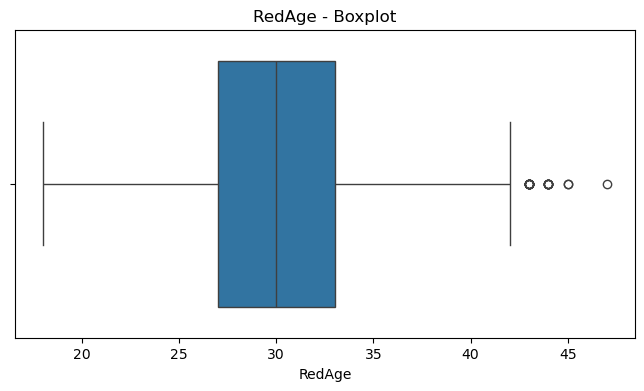

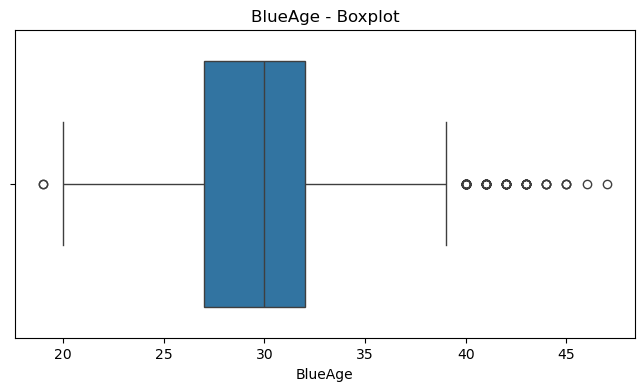

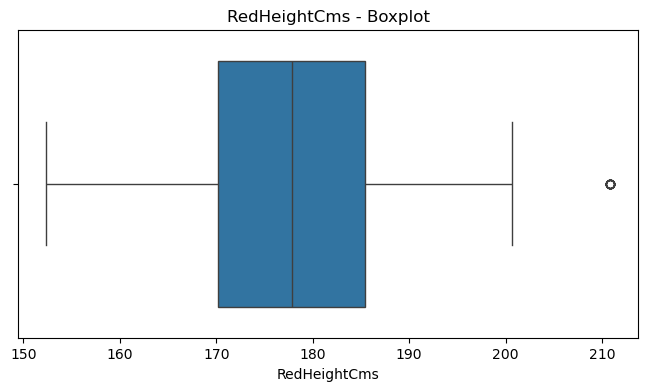

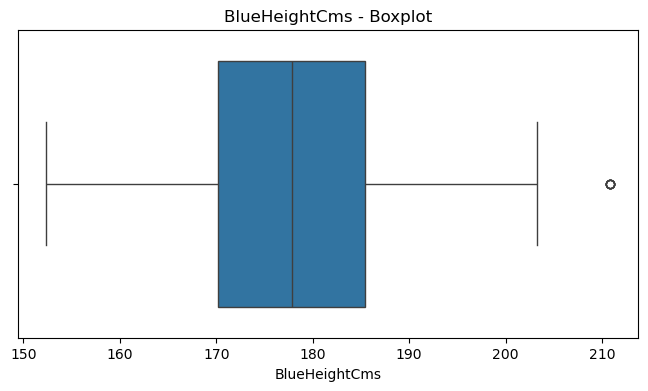

In [51]:
cols = ['RedAge', 'BlueAge', 'RedHeightCms', 'BlueHeightCms']

import seaborn as sns
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=ufc_raw[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

## 7. Check Clean Data

In [52]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Null values per column:
 Series([], dtype: int64)

Duplicate rows: 0


In [53]:
# Preview the first few records
display(ufc_raw.head())
display(ufc_raw.columns)
# Para ver los tipos de dato de cada columna:
display(ufc_raw.dtypes)


RedFighter        BlueFighter Winner  TitleBout Gender  \
0  Colby Covington    Joaquin Buckley   Blue      False   MALE   
1      Cub Swanson  Billy Quarantillo    Red      False   MALE   
2       Manel Kape        Bruno Silva    Red      False   MALE   
3    Vitor Petrino      Dustin Jacoby   Blue      False   MALE   
4     Adrian Yanez      Daniel Marcos   Blue      False   MALE   

   NumberOfRounds  BlueCurrentLoseStreak  BlueCurrentWinStreak  BlueDraws  \
0               5                      0                     5          0   
1               3                      1                     0          0   
2               3                      0                     4          0   
3               3                      2                     0          1   
4               3                      0                     4          0   

   BlueLongestWinStreak  ...  TotalTitleBoutDif  KODif  SubDif  HeightDif  \
0                     5  ...                 -4      4      -2      -2.54   
1                     4  ...                  0     -2      -1       5.08   
2                     4  ...                  0      1       1      -2.54   
3                     4  ...                  0      2      -1       2.54   
4                     4  ...                  0     -5       0       0.00   

   ReachDif  AgeDif  SigStrDif  AvgSubAttDif  AvgTDDif  BetterRank  
0     10.16      -6       0.25          -0.2     -1.83         Red  
1      0.00      -5       2.69           0.7      0.20     neither  
2     -7.62       3      -1.12          -0.2      1.72         Red  
3     -2.54       9       2.68          -0.8     -3.62     neither  
4     -2.54       0      -0.57           0.0      0.25     neither  

[5 rows x 64 columns]

Index(['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'Gender',
       'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak',
       'BlueDraws', 'BlueLongestWinStreak', 'BlueLosses',
       'BlueTotalRoundsFought', 'BlueTotalTitleBouts',
       'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit',
       'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission',
       'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance',
       'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws',
       'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct',
       'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought',
       'RedTotalTitleBouts', 'RedWinsByDecisionMajority',
       'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO',
       'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins',
       'RedStance', 'RedHeightCms', 'RedReachCms', 'RedWeightLbs',

RedFighter       object
BlueFighter      object
Winner           object
TitleBout          bool
Gender           object
                 ...   
AgeDif            int64
SigStrDif       float64
AvgSubAttDif    float64
AvgTDDif        float64
BetterRank       object
Length: 64, dtype: object

## 6. Save

In [54]:
# Save the cleaned file
ufc_raw.to_csv(f'{project_root}/data/processed/ufc_etl.csv', index=False)
print("\nETL file saved as 'ufc_etl.csv'.")


ETL file saved as 'ufc_etl.csv'.
